In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] =  18.0

In [18]:
# Instantiate the model
model = models.Marinescu2016()


# Obtain model parameter dictionary
param = model.default_parameter_values

# Update the parameters for charge
param.update(
    {
        "Current function [A]": 1.7
        }
)

# Instantiate simulation object 
sim = pybamm.Simulation(
    model,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

# Define the time cut-off for charging in second
time_in_seconds = int(3600/(1.7/3.38))

# Simulate the model 
sim.solve([0,time_in_seconds]);

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

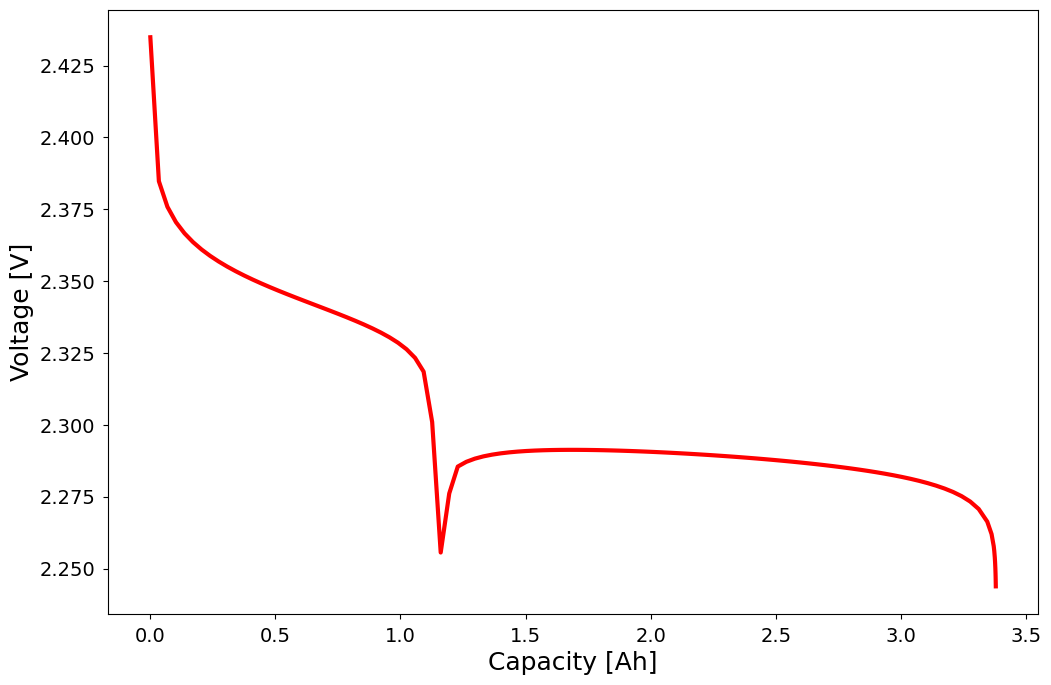

In [19]:
plt.plot(sim.solution.t*1.7/3600, sim.solution['Terminal voltage [V]'].entries)

plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');
#plt.savefig('Cornish & Marinescu (2021)/Figures/is_discharge_v',format='eps')

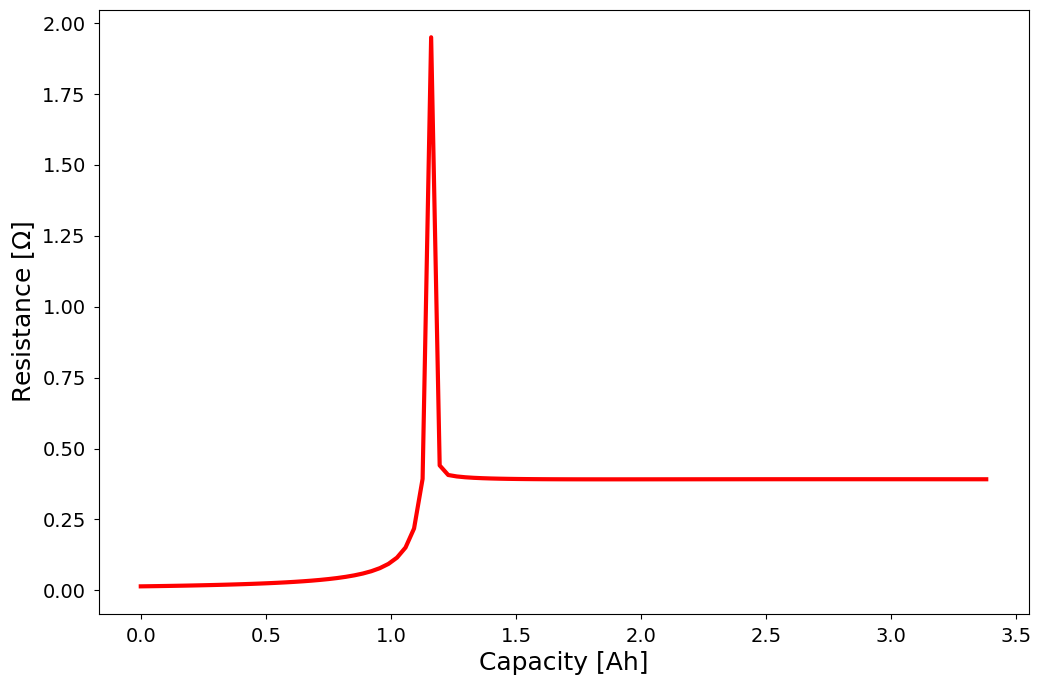

In [28]:
capacity = 1.7*sim.solution.t/3600
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

R = .01/(.7 - Li)

plt.plot(capacity,R)

plt.xlabel('Capacity [Ah]')
plt.ylabel('Resistance [$\Omega$]');
plt.savefig('Cornish & Marinescu (2021)/Figures/marinescu_discharge_res',format='eps')